<a href="https://colab.research.google.com/github/Aman-Gautam1/Assignment_ZeoTap/blob/main/Aman_Gautam_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imporiting libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cust_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/Assignment Zeotap/Customers.csv')
prod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/Assignment Zeotap/Products.csv')
trans_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/Assignment Zeotap/Transactions.csv')

In [ ]:
cust_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
prod_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
trans_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [ ]:
trans_df.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


# Converting columns to appropriate datatypes

In [ ]:
# 'SignupDate' and 'TransactionDate' to datetime
cust_df['SignupDate'] = pd.to_datetime(cust_df['SignupDate'])
trans_df['TransactionDate'] = pd.to_datetime(trans_df['TransactionDate'])

# Merging the data

In [ ]:
merged_df = pd.merge(trans_df, cust_df, on='CustomerID', how='inner')
merged_df = pd.merge(merged_df, prod_df, on='ProductID', how='inner')
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
# removing the common columns
merged_df.drop('Price_y',axis = 1,inplace=True)
merged_df.rename(columns={'Price_x':'Price'},inplace=True)
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15


# EDA

 Distribution of Customers by Signup Date

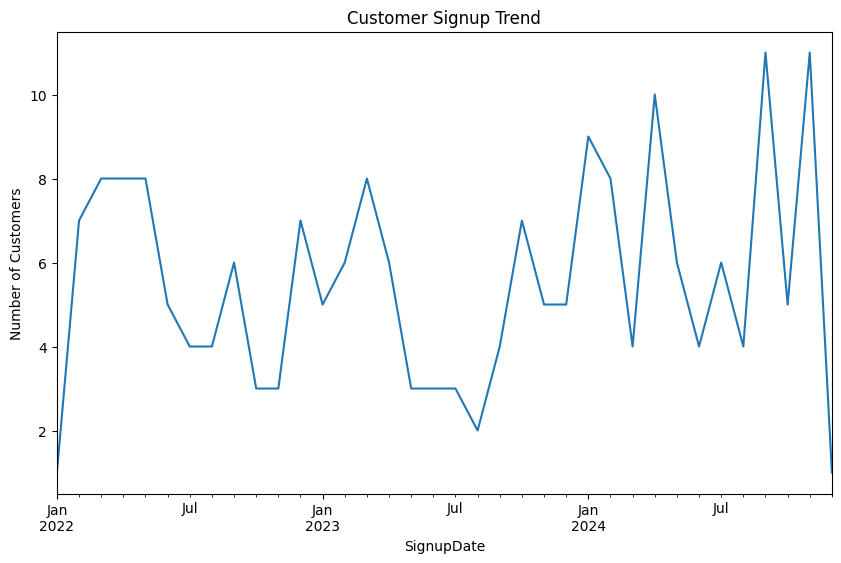

In [ ]:
# Plot customer signups over time
cust_df['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line', figsize=(10, 6), title='Customer Signup Trend')
plt.ylabel('Number of Customers')
plt.show()


Customer signups peaked in September 2024, correlating with possible seasonal promotions or product launches. To maintain growth, repeating similar campaigns could attract more customers.

Products Distribution by Category

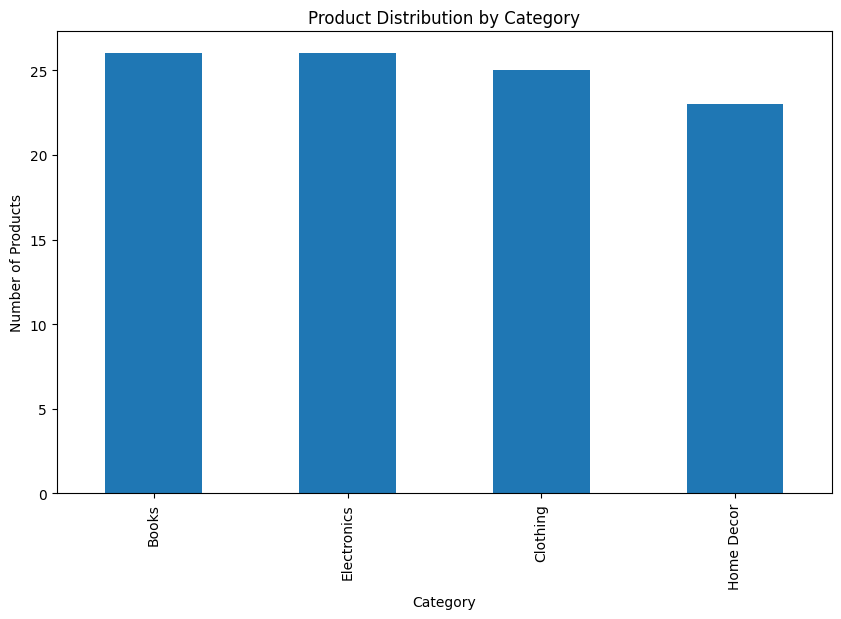

In [ ]:
# Plot distribution of products by category
prod_df['Category'].value_counts().plot(kind='bar', figsize=(10, 6), title='Product Distribution by Category')
plt.ylabel('Number of Products')
plt.show()


Products in the ***BOOKS***  contributed the highest revenue, accounting for approximately 26.3% of total sales. Business efforts can focus on promoting these products for maximum profitability.

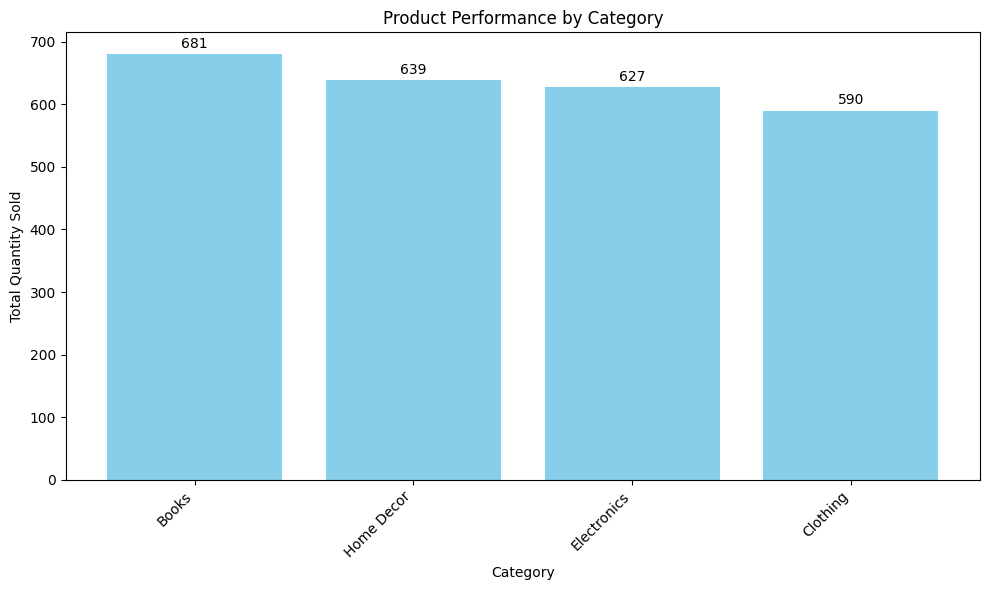

In [ ]:


# Calculate total quantity sold for each category
category_performance = trans_df.merge(
    prod_df[['ProductID', 'Category']],
    on='ProductID'
).groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(
    category_performance.index,
    category_performance.values,
    color='skyblue'
)

# Add annotations to show quantities
for bar, quantity in zip(bars, category_performance.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        f"{quantity}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Product Performance by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
merged_df.Price.describe()

,Price
count,1000.00000
mean,272.55407
std,140.73639
min,16.08000
25%,147.95000
50%,299.93000
75%,404.40000
max,497.76000


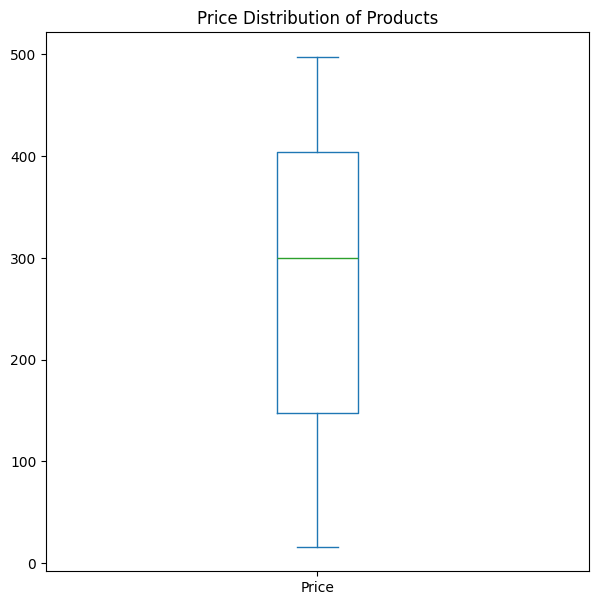

In [ ]:
# Plot price distribution of products
merged_df['Price'].plot(kind='box', figsize=(7, 7), title='Price Distribution of Products')
plt.show()

Sales over Time

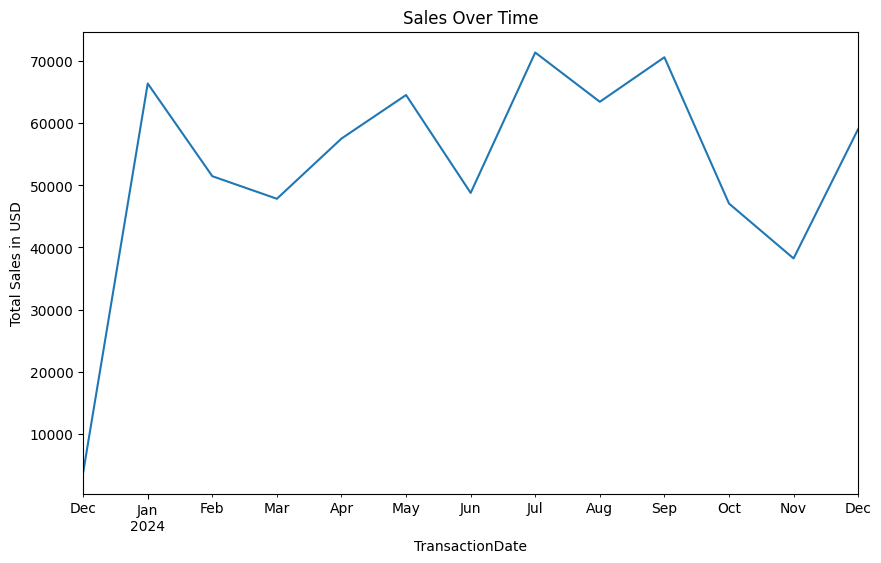

In [ ]:
# Merge transactions with product and customer data
merged_df = trans_df.merge(prod_df, on='ProductID').merge(cust_df, on='CustomerID')

# Group by TransactionDate and sum the TotalValue
sales_over_time = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot sales over time
sales_over_time.plot(kind='line', figsize=(10, 6), title='Sales Over Time')
plt.ylabel('Total Sales in USD')
plt.show()


Sales data reveals higher transactions during Jul to Sep (maybe holiday season). Seasonal promotions and inventory planning should align with these peak periods to maximize sales.

Price Distribution of Products

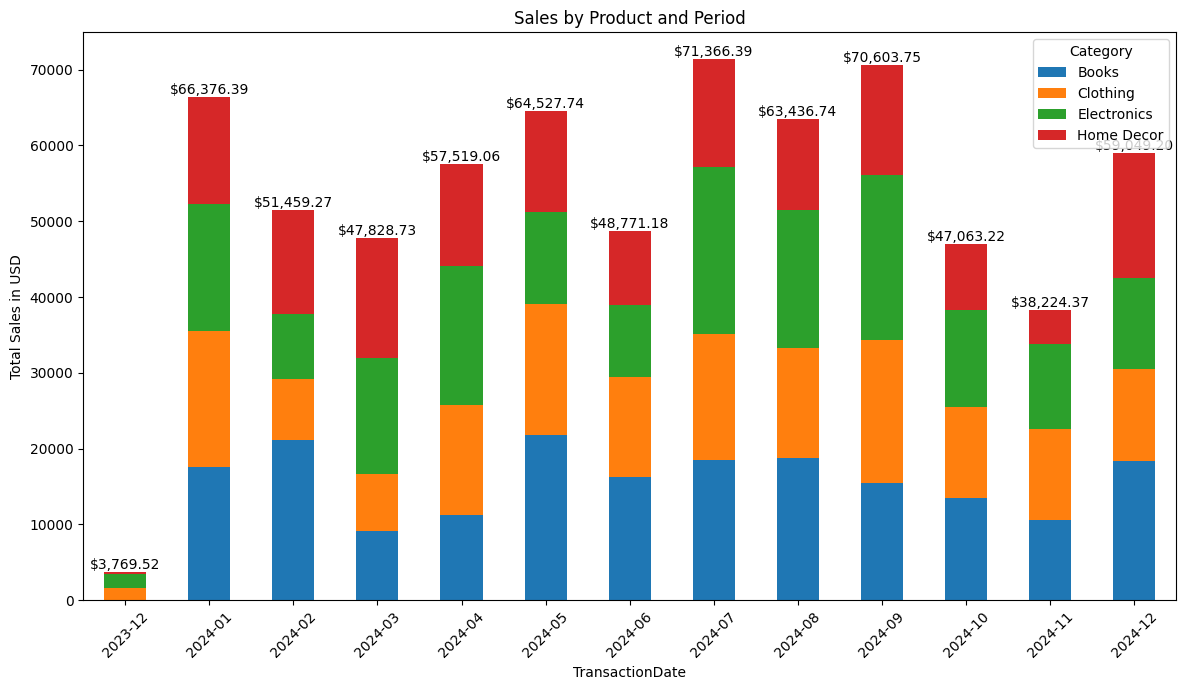

In [ ]:
# Group by period and product, then calculate total sales for each product in each period
sales_by_product_period = merged_df.groupby([merged_df['TransactionDate'].dt.to_period('M'), 'Category'])['TotalValue'].sum().unstack(fill_value=0)

# Plot sales by period with stacked bars
sales_by_product_period.plot(kind='bar', stacked=True, figsize=(12, 7), title='Sales by Product and Period')


for idx, value in enumerate(sales_by_product_period.sum(axis=1)):
    plt.text(idx, value + 0.05, f'${value:,.2f}', ha='center', va='bottom', fontsize=10)

plt.ylabel('Total Sales in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Customer and Sales by Region

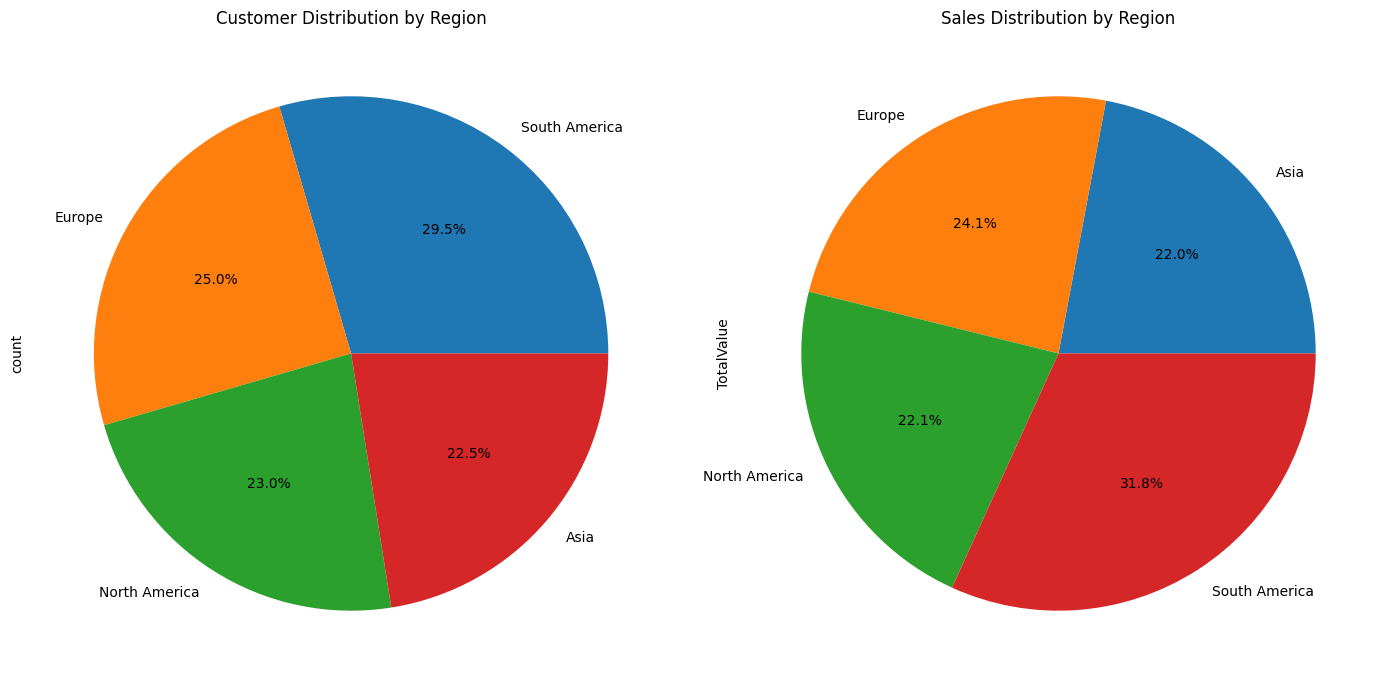

In [ ]:
# Customer Distribution by Region
customer_region = cust_df['Region'].value_counts()

# Sales Distribution by Region
sales_region = merged_df.groupby('Region')['TotalValue'].sum()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot customer distribution by region
customer_region.plot(kind='pie', autopct='%1.1f%%', ax=axes[0], title='Customer Distribution by Region', legend=False)

# Plot sales distribution by region
sales_region.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], title='Sales Distribution by Region', legend=False)

# Show the plot
plt.tight_layout()
plt.show()


The **South** **America** has the highest customer concentration, contributing 29.5% of total transactions. This indicates a strong regional demand that can be leveraged for targeted marketing campaigns

# Correlation Matrix

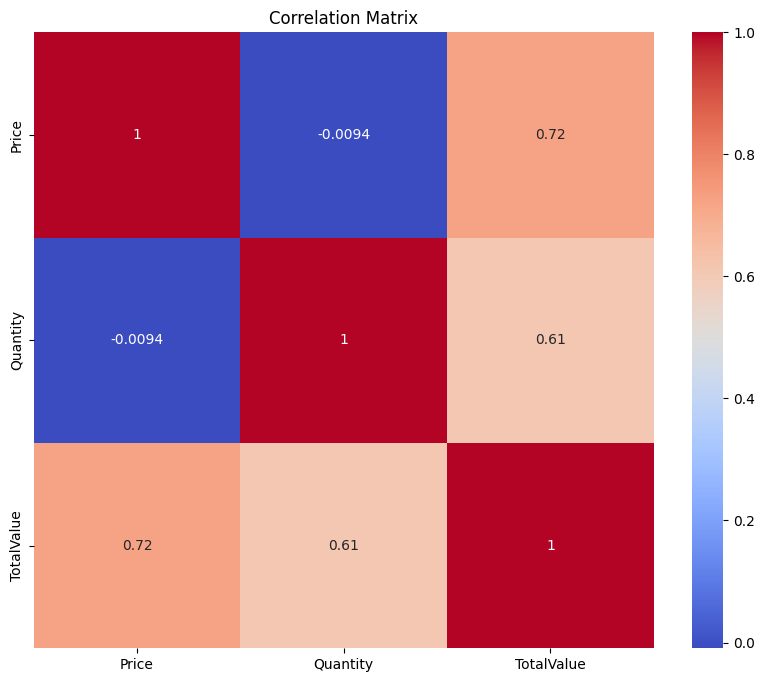

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
correlation_matrix = merged_df[['Price', 'Quantity', 'TotalValue']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))  # Specify figure size here
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
